<a href="https://colab.research.google.com/github/pesfahanian/Computational_Geometry/blob/master/Computational_Geometry_Slow_convex_hull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Input:    A list of n point L = [p1, p2, ... , pn].
# Output:   A sublist of L as the convex hull CH(L) of L.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def orientation(points):
    data = np.array(points)
    x, y = data.T
    o = (data[1][1] - data[0][1])*(data[2][0] - data[1][0]) - (data[2][1] - data[1][1])*(data[1][0] - data[0][0])
    if(o > 0):
        return "Right turn (Clockwise)"
    if(o < 0):
        return "Left turn (Counter_Clockwise)"
    if(o == 0):
        return "Line"

In [0]:
def slow_convex_hull(points):
    data = np.array(points)
    # x, y = data.T
    # plt.scatter(x, y)
    # plt.show()
    points.sort()
    # print(points)
    # print('////////////////////////////////')
    current_point = points[0]
    start = current_point
    # counter = 1
    CH = []
    while(True):
        # print('points', points)
        # print('current_point', current_point)
        # print(points.index(current_point))
        for i in range(0, len(points)):
            check = True
            if(i == points.index(current_point)):
                continue
            # print('next?: ', points[i])
            for j  in range(0, len(points)):
                if((j == points.index(current_point)) or (j == i)):
                    continue
                # print('remaining: ', points[j])
                # print(current_point, points[i], points[j])
                # print(orientation([current_point, points[i], points[j]]))
                if(orientation([current_point, points[i], points[j]])=="Left turn (Counter_Clockwise)"):
                    check = False
                    # print('Break')
                    break
            if(check != False):
                # print('check was true')
                # tmp = current_point
                current_point = points[i]
                # points.pop(points.index(tmp))
                # print('current_point', current_point)
                CH.append(current_point)
                # print(CH)
                break
            # print('--------')
        # print(points)
        # print('**************************')
        # counter = counter + 1
        if(current_point == start):
            break
    return CH

Convex hull: [(-10, 4), (-7, 8), (8, 6), (8, -7), (6, -10), (-9, -5), (-10, 3)]


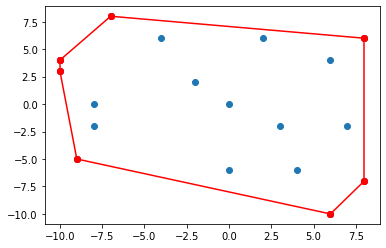

In [0]:
# L = [(0, 3), (2, 2), (1, 1), (2, 1), (3, 0), (0, 0), (3, 3)]
L = [(-7, 8), (-4, 6), (2, 6), (6, 4), (8, 6), (7, -2), (4, -6), (8, -7), (0, 0), (3, -2), (6, -10), (0, -6), (-9, -5), (-8, -2), (-8, 0), (-10, 3), (-2, 2), (-10, 4)]
CH = slow_convex_hull(L)
print('Convex hull:', CH)
CH.append(CH[0])
a, b = np.array(L).T
plt.scatter(a, b)
x, y = np.array(CH).T
for i in range(0, len(x), 1):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')
plt.show()